In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Adatok betöltése
df = pd.read_csv('input.csv')
test_data = pd.read_csv('validation.csv')

# Egyesített adatkeret létrehozása
combined_data = pd.concat([df, test_data], axis=0)

# factorize alkalmazása az egyesített adatokra
combined_data['shape'], _ = pd.factorize(combined_data['cap-shape'])
combined_data['type'], _ = pd.factorize(combined_data['ring-type'])
combined_data['ring'], _ = pd.factorize(combined_data['has-ring'])
combined_data['color'], _ = pd.factorize(combined_data['cap-color'])

# Train és test adatok visszaállítása
df = combined_data.iloc[:len(df), :].copy()
test_data = combined_data.iloc[len(df):, :].copy()

df = df[df['shape'] != -1]
df = df[df['ring'] != -1]
df = df[df['color'] != -1]
df.head()

,cap-diameter,stem-height,stem-width,date,cap-shape,cap-color,has-ring,ring-type,class,shape,type,ring,color
0,5.35,5.65,4.60,2020.04.01,x,g,t,l,e,0,0,0,0
1,6.62,5.61,7.08,2020.04.11,b,n,t,NaN,p,1,-1,0,1
2,4.96,4.99,6.59,2020.06.18,x,e,f,f,p,0,1,1,2
3,NaN,4.17,2.62,2020.02.05,b,w,f,f,e,1,1,1,3
4,6.99,8.80,10.11,2020.09.04,x,e,t,z,p,0,2,0,2


In [3]:
df.fillna(df.median(), inplace=True)

C:\Users\kelle\AppData\Local\Temp\ipykernel_5584\3604797450.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


(array([ 2994., 20312., 10955.,  3086.,   824.,   581.,   133.,   110.,
           64.,    21.]),
 array([ 0.   ,  3.243,  6.486,  9.729, 12.972, 16.215, 19.458, 22.701,
        25.944, 29.187, 32.43 ]),
 <BarContainer object of 10 artists>)

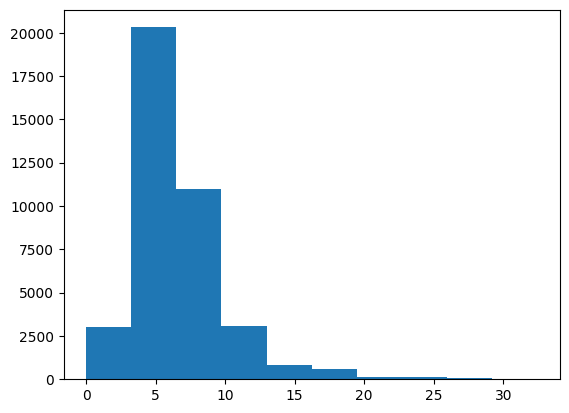

In [4]:
df = df[df['stem-height'] < 33]
plt.hist(df['stem-height'])

In [5]:
df.describe()

,cap-diameter,stem-height,stem-width,shape,type,ring,color
count,39080.000000,39080.000000,39080.000000,39080.000000,39080.000000,39080.000000,39080.000000
mean,6.764798,6.581379,12.170794,1.557395,1.336208,0.750793,3.192068
std,5.366977,3.351806,10.022371,1.787985,1.321843,0.432559,2.839607
min,0.440000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,3.490000,4.640000,5.240000,0.000000,1.000000,1.000000,1.000000
50%,5.875000,5.950000,10.230000,1.000000,1.000000,1.000000,2.000000
75%,8.540000,7.740000,16.610000,2.000000,1.000000,1.000000,6.000000
max,62.340000,32.430000,102.480000,6.000000,7.000000,1.000000,11.000000


In [10]:
from sklearn import metrics as ms
from sklearn import neighbors

bestK = 0 
k=1
bestAcc = 0
features = ['cap-diameter','stem-height','stem-width','shape','type','ring','color']
label = 'class'

feat_data = df[features].copy()
label_data = df[label].copy()

X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)

while k<20:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    acc = ms.accuracy_score(y_test.values, prediction)
    if(acc > bestAcc):
        bestAcc=acc
        bestK = k
    k+=1

print(bestAcc)
print(bestK)

0.9541965199590583
6


In [11]:
X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)

#KNeighbors #0.9531897819981275
clf = neighbors.KNeighborsClassifier(6)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("KNeighbors: ",ms.accuracy_score(y_test.values, prediction))

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection


#DecisionTree #0.9281797512371271
#clf = DecisionTreeClassifier(max_depth=19, criterion='gini')
#clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
#print("DecisionTree: ",ms.accuracy_score(y_test.values, prediction))

#Bagging #0.9501136819580045
#dt = DecisionTreeClassifier() 
#clf = BaggingClassifier(estimator=dt, n_estimators=17, random_state=7)
#clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
#print("Bagging: ",ms.accuracy_score(y_test.values, prediction))


#RandomForest #0.9543934733181757
#clf = RandomForestClassifier(n_estimators = 79, max_depth=50, random_state=0)
#clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
#print("RandomForest: ",ms.accuracy_score(y_test.values, prediction))

#AdaBoost #0.9402166644376087
#dt = DecisionTreeClassifier(max_depth=17)
#clf = AdaBoostClassifier(estimator=dt, n_estimators=25, random_state=0)

#clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
#print("AdaBoost: ",ms.accuracy_score(y_test.values, prediction))


clf.fit(df[features], df[label])
prediction = clf.predict(test_data[features].copy())
np.savetxt('pred.txt', prediction, fmt='%s')

KNeighbors:  0.9541965199590583


In [8]:
test_data.describe()

,cap-diameter,stem-height,stem-width,shape,type,ring,color
count,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,6.739896,6.627231,12.193819,1.524614,1.343568,0.752124,3.218094
std,5.250945,3.374310,10.148121,1.766075,1.328748,0.431802,2.858703
min,0.500000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,3.460000,4.680000,5.115000,0.000000,1.000000,1.000000,1.000000
50%,5.870000,5.980000,10.110000,1.000000,1.000000,1.000000,2.000000
75%,8.650000,7.770000,16.675000,2.000000,1.000000,1.000000,6.000000
max,58.890000,32.030000,98.000000,6.000000,7.000000,1.000000,11.000000


In [9]:
df.describe()

,cap-diameter,stem-height,stem-width,shape,type,ring,color
count,39080.000000,39080.000000,39080.000000,39080.000000,39080.000000,39080.000000,39080.000000
mean,6.764798,6.581379,12.170794,1.557395,1.336208,0.750793,3.192068
std,5.366977,3.351806,10.022371,1.787985,1.321843,0.432559,2.839607
min,0.440000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,3.490000,4.640000,5.240000,0.000000,1.000000,1.000000,1.000000
50%,5.875000,5.950000,10.230000,1.000000,1.000000,1.000000,2.000000
75%,8.540000,7.740000,16.610000,2.000000,1.000000,1.000000,6.000000
max,62.340000,32.430000,102.480000,6.000000,7.000000,1.000000,11.000000
